## 2. Conditional density estimation for the Banana distribution

In this notebook, we will show how to perform conditional density estimation. For a state variable $\mathsf{X} \sim \pi_{\mathsf{X}} \in \mathbb{R}^n$ and an observation variable $\mathsf{Y} \sim \pi_{\mathsf{X}} \in \mathbb{R}^d$, we are interested in the characterization of the posterior density $\pi_{\mathsf{X}| \mathsf{Y}}(\boldsymbol{x} | \boldsymbol{y}^\star)$, where $\boldsymbol{y}^\star$ is the realization of the observation $\mathsf{Y}$. In particular, we would like to sample from the posterior density $\pi_{\mathsf{X} | \mathsf{Y}} (\boldsymbol{x} | \boldsymbol{y}^\star)$ given $N_e$ samples $\{ \boldsymbol{x}^1, \ldots, \boldsymbol{x}^{N_e} \}$ from the prior density $\pi_{\mathsf{X}}$.

Let $\boldsymbol{S} \colon \mathbb{R}^{n+d} \xrightarrow{} \mathbb{R}^{n+d}$ be the KR rearrangement that pushes forward the joint density $\pi_{\mathsf{X}, \mathsf{Y}}$ (target density) to the standard normal density $\mathcal{N}(\boldsymbol{0}_{n+d}, \boldsymbol{I}_{n+d})$ (reference density). From its lower triangular structure, $\boldsymbol{S}$ can be decomposed as follows:

\begin{equation}
\label{eqn:split}
\boldsymbol{S}(\boldsymbol{y}, \boldsymbol{x})=\left[\begin{array}{c}
\begin{aligned}
& \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}) \\
& \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x})
\end{aligned}
\end{array}\right],
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{Y}}} \colon \mathbb{R}^d \xrightarrow{} \mathbb{R}^{d}$ and $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}} \colon \mathbb{R}^{n+d} \xrightarrow{} \mathbb{R}^{n}$. For a sample $(\boldsymbol{y}, \boldsymbol{x})$ from the joint density, $\boldsymbol{a} = \boldsymbol{S}^{\boldsymbol{\mathcal{Y}}}(\boldsymbol{y}, \boldsymbol{x})$ is a sample from $\mathcal{N}(\boldsymbol{0}_{n}, \boldsymbol{I}_{n})$, as $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\mathsf{Y}, \mathsf{X}) \sim \mathcal{N}(\boldsymbol{0}_{n}, \boldsymbol{I}_{n})$.

For a realization $\boldsymbol{y}^\star \in \mathbb{R}^d$ of the observation variable, instead of $\boldsymbol{y}$, we update our prior estimate $\boldsymbol{x}$ into $\boldsymbol{x}_a$ such that  $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{a}$. Therefore, the analysis step looks for $\boldsymbol{x}_a \in \mathbb{R}^n$ such that:
\begin{equation}
\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{x}_a) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}).
\end{equation}

The map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ pushes forward the posterior density $\pi_{\mathsf{X} | \mathsf{Y}}(\cdot | \boldsymbol{y}^\star)$ to the standard normal density $\mathcal{N}(\boldsymbol{0}_{n}, \boldsymbol{I}_{n})$, so $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ is a bijection of $\mathbb{R}^n$ and there exists a unique solution to the vector-valued nonlinear equation above, denoted $\boldsymbol{x}_a$. This solution is exactly the posterior update of the prior estimate $\boldsymbol{x}$ given the realization $\boldsymbol{y}^\star$ of the observation variable. We arrive at the definition of the analysis map $\boldsymbol{T} \colon \mathbb{R}^d \times \mathbb{R}^n \xrightarrow{} \mathbb{R}^n$:
\begin{equation}
\label{eqn:tmapdef}
    \boldsymbol{T}(\boldsymbol{y}, \boldsymbol{x}) = \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}\circ \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}, \boldsymbol{x}),
\end{equation}
where $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \cdot)^{-1}$ 
denotes the inverse of the map $\boldsymbol{\xi} \mapsto \boldsymbol{S}^{\boldsymbol{\mathcal{X}}}(\boldsymbol{y}^\star, \boldsymbol{\xi})$ that comes from setting the first $d$ entries of $\boldsymbol{S}^{\boldsymbol{\mathcal{X}}}$ to $\boldsymbol{y}^\star$.

References: 
* Spantini, A., Baptista, R. and Marzouk, Y., 2019. Coupling techniques for nonlinear ensemble filtering. arXiv preprint arXiv:1907.00389. 
* Le Provost, M., Baptista, R., Marzouk, Y. and Eldredge, J., 2021. A low-rank nonlinear ensemble filter for vortex models of aerodynamic flows. In AIAA Scitech 2021 Forum (p. 1937).

In [16]:
using Revise
using LinearAlgebra
using AdaptiveTransportMap
using Statistics
using Distributions

Load some packages to make nice figures

In [17]:
using Plots
default(tickfont = font("CMU Serif", 9), 
        titlefont = font("CMU Serif", 14), 
        guidefont = font("CMU Serif", 12),
        legendfont = font("CMU Serif", 10),
        grid = false)
pyplot()

using LaTeXStrings
PyPlot.rc("text", usetex = "true")
PyPlot.rc("font", family = "CMU Serif")
# gr()
using ColorSchemes

### Problem setup

 We start by generating $N_e$ samples from a banana distribution.

In [76]:
function swaprows!(X::AbstractMatrix, i::Integer, j::Integer)
    @inbounds for k = 1:size(X,2)
        X[i,k], X[j,k] = X[j,k], X[i,k]
    end
end

swaprows! (generic function with 1 method)

In [131]:
Ne = 500 # Number of samples
Nx = 2 # Dimension of the state

# Define the parameters of the banana distribution
μ = 0.0
σ = 1.5
bananicity = 0.7

# Generate the samples
X = sample_banana(Ne, μ = μ, σ = σ, bananicity = bananicity)
# swaprows!(X, 1, 2)
# Define the observation variable 
ystar = 3.5
Ystarprime = ystar*ones(1, Ne);

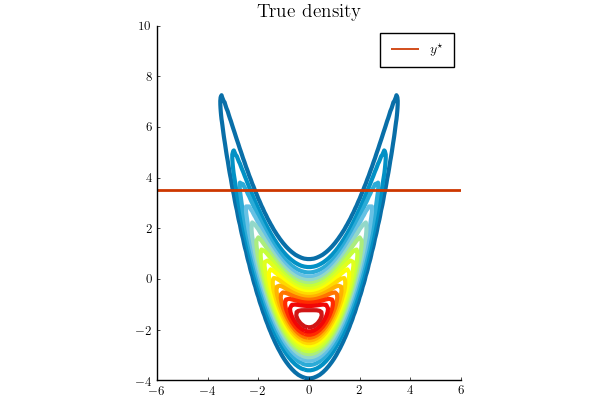

In [132]:
Nlog = 100
logbanana = zeros(Nlog, Nlog)

xrange = range(-6.0; stop = 6.0, length = Nlog)
yrange = range(-4.0; stop = 10.0, length = Nlog)

for (i,x) in enumerate(xrange)
    for (j,y) in enumerate(yrange)
        logbanana[i,j] = log_pdf_banana([x;y]; μ = μ, σ = σ, bananicity = bananicity)
    end
end


contour(xrange, yrange, exp.(logbanana)', ratio = 1,
         title = "True density",
         colorbar = false, grid = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (xrange[1], xrange[end]), ylim = (-Inf, Inf), linewidth = 3)
hline!([ystar], linewidth = 2, label = L"y^\star", color = :orangered3)

We define an object of  `HermiteMap` `S` to hold the Knothe-Rosenblatt rearrangement that pushes forward $\pi$ to the reference density, i.e. the standard Gaussian distribution $\rho$.
The default constructor for an `HermiteMap` requires, where $m$ is the maximal order of the Hermite polynomials considered in the expansion, $N_x$ the dimension of the state, $L$ a linear transformation that rescale the samples to get zero mean and unitary standard deviation component-wise, and $C$ an array of $N_x$ `MapComponent`.

In [133]:
m = 30
S = HermiteMap(m, X; diag = true);

The next step is to use the greedy algorithm developed by Baptista et al. (2020) to construct a sparse expansion of the different components of the map $S$. Depending on the accuracy of the amp required. Several options are possible for the optimization: 
* `kfold` uses a k-fold cross validation procedure (the more robust choice)
* `split` splits the set of samples into a training and a testing
* An `Int64` to determine the maximum number of features for each component $s^k$ of the map $S$
* `nothing` to simply optimize the existing coefficients in the basis expansion

In [134]:
optimize(S, X, "kfold"; withqr = true)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:04


HermiteMap(30, 2, LinearTransform(2, [0.14154699332724363, 0.06305137636346206], [1.521477316717062 0.0; 0.0 2.3861925156430313], true), MapComponent[Map component of dimension 1 with Nψ 1 active features
, Map component of dimension 2 with Nψ 13 active features
])

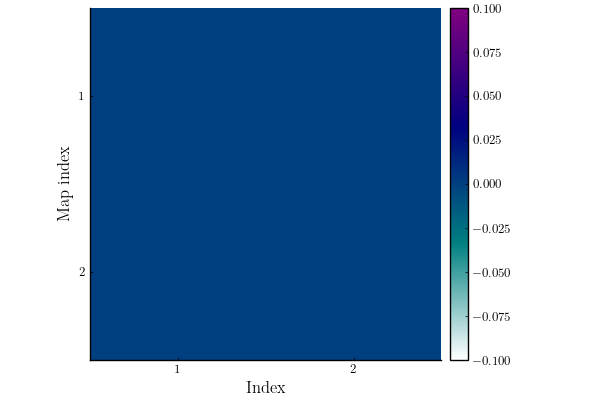

In [125]:
plot(S; degree = false)

In [126]:
F = deepcopy(evaluate(S, X; start = 2))

2×1000 Array{Float64,2}:
 0.0          0.0       0.0      …  0.0       0.0         0.0
 0.00640238  -0.145054  0.22778     1.13621  -0.0733783  -0.0426069

In [127]:
Xpost = deepcopy(X)

2×1000 Array{Float64,2}:
  0.678159    0.343562  0.883598   0.0438735  …  2.2662   0.431476  -0.566568
 -0.0445526  -0.403451  0.480035  -0.471834      2.6327  -0.233605  -0.160687

In [128]:
# Generate posterior samples
@time inverse!(F, S, Xpost, Ystarprime; apply_rescaling = true, start = 2)

converged(result) = true
  0.000834 seconds (190 allocations: 475.891 KiB)


2×1000 Array{Float64,2}:
  3.5         3.5       3.5        3.5       …  3.5      3.5        3.5
 -0.0445526  -0.403451  0.480035  -0.471834     2.6327  -0.233605  -0.160687

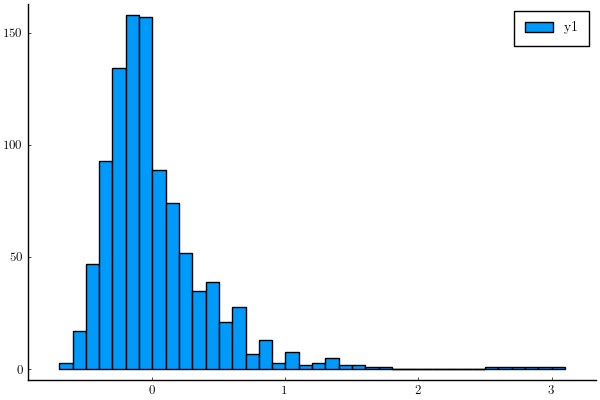

In [129]:
histogram(Xpost[2,:])

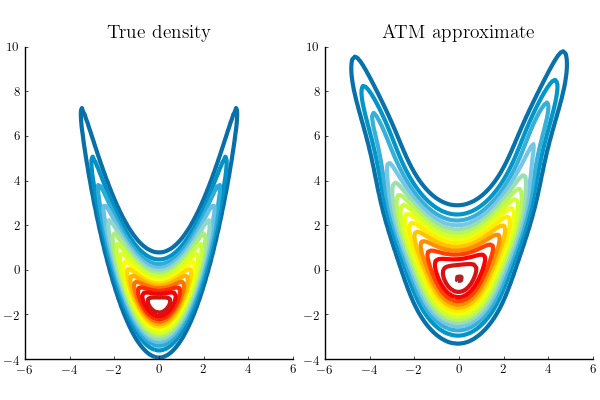

In [130]:
plt = plot(layout = grid(1, 2), colorbar = false, grid = false)
contour!(plt[1,1], xrange, yrange, exp.(logbanana)', ratio = 1,
         title = "True density",
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (xrange[1], xrange[end]), ylim = (-Inf, Inf), linewidth = 3)

contour!(plt[1,2], xrange, yrange, exp.(logbanana_approx)', ratio = 1,
         title = "ATM approximate",
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (xrange[1], xrange[end]), ylim = (-Inf, Inf), linewidth = 3)

We can overlap the estimated density with the sampples

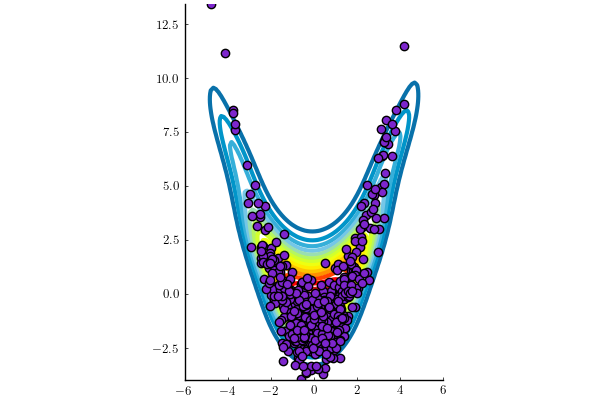

In [110]:
contour(xrange, yrange, exp.(logbanana_approx)', ratio = 1, colorbar = false,
         color = cgrad([:dodgerblue4, :deepskyblue3, :skyblue, :olivedrab1, :yellow, :orange, :red, :firebrick]),
         xlim = (-Inf, Inf), ylim = (-Inf, Inf), linewidth = 3)
scatter!(X[1,:], X[2,:]; legend = false, color = :purple3, ratio = 1, markersize = 6)